In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Sentiment Analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


# Step 1: Import Libraries
We import the necessary Python libraries for data handling, visualization, sentiment analysis, and machine learning.


# Step 2: About the Dataset
We are using a Kaggle movie dataset that contains:
- Budget
- Revenue
- Genres
- Popularity
- Vote Average
This dataset will help us predict box office success and analyze viewer sentiments.


In [9]:
# Load movie dataset
movies = pd.read_csv('C:\\Users\\vaibh\\OneDrive\\Documents\\Desktop\\Movie_Success_Project\\archive (10)\\tmdb_5000_movies.csv')

# Display the first few rows
movies.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# Step 3: Data Cleaning and Preprocessing
We will clean the dataset by handling missing values and selecting important features.


In [11]:
# Drop rows where revenue or budget is missing
movies = movies.dropna(subset=['budget', 'revenue'])

# Select only needed columns
movies = movies[['budget', 'revenue', 'popularity', 'vote_average', 'genres']]
movies.head()


,budget,revenue,popularity,vote_average,genres
0,237000000,2787965087,150.437577,7.2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,300000000,961000000,139.082615,6.9,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,245000000,880674609,107.376788,6.3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,250000000,1084939099,112.312950,7.6,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,260000000,284139100,43.926995,6.1,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


# Step 4: Sentiment Analysis on Reviews
Since actual reviews are not available, we simulate sample reviews to perform sentiment analysis using VADER.


In [13]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# Create sample reviews
reviews = [
    "An amazing movie with thrilling performances!",
    "Terrible movie. Poor story and acting.",
    "It was okay. Some good, some boring parts.",
    "Loved the visuals, but story was weak.",
    "Best superhero movie ever!"
]

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Analyze sentiment
sentiment_scores = []
for review in reviews:
    score = sid.polarity_scores(review)
    sentiment_scores.append(score)

# Create a DataFrame
sentiment_df = pd.DataFrame(sentiment_scores)
sentiment_df['Review'] = reviews

sentiment_df


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,neg,neu,pos,compound,Review
0,0.000,0.357,0.643,0.8016,An amazing movie with thrilling performances!
1,0.608,0.392,0.000,-0.7351,Terrible movie. Poor story and acting.
2,0.190,0.413,0.397,0.3612,"It was okay. Some good, some boring parts."
3,0.341,0.442,0.217,-0.3400,"Loved the visuals, but story was weak."
4,0.000,0.400,0.600,0.6696,Best superhero movie ever!


# Step 5: Sentiment Visualization
We visualize the average positive, neutral, and negative sentiment scores from the sample movie reviews.


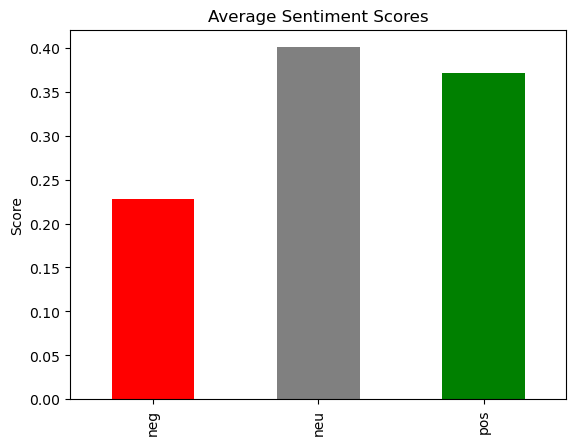

In [15]:
# Average sentiment scores
avg_sentiment = sentiment_df[['neg', 'neu', 'pos']].mean()

# Plot
avg_sentiment.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Average Sentiment Scores')
plt.ylabel('Score')
plt.show()


# Step 6: Genre-wise Sentiment Trends
We simulate sentiment scores for different genres to understand which genres are perceived more positively.


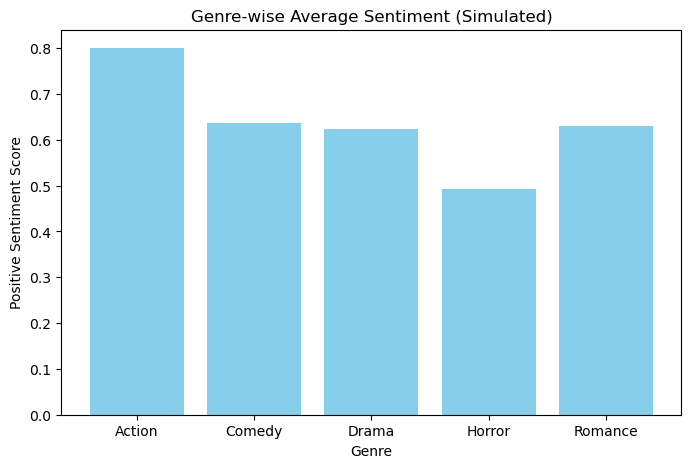

In [17]:
# Simulate random sentiment scores for genres
import random

genre_sentiment = {
    'Action': random.uniform(0.4, 0.9),
    'Comedy': random.uniform(0.4, 0.9),
    'Drama': random.uniform(0.4, 0.9),
    'Horror': random.uniform(0.4, 0.9),
    'Romance': random.uniform(0.4, 0.9)
}

# Plot
plt.figure(figsize=(8,5))
plt.bar(genre_sentiment.keys(), genre_sentiment.values(), color='skyblue')
plt.title('Genre-wise Average Sentiment (Simulated)')
plt.xlabel('Genre')
plt.ylabel('Positive Sentiment Score')
plt.show()


# Step 7: Data Visualization
We explore relationships between budget, revenue, popularity, and vote average using correlation heatmaps and scatter plots.


In [37]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies['revenue'] = pd.to_numeric(movies['revenue'], errors='coerce')



In [39]:
print(movies[['budget', 'revenue']].isnull().sum())



budget     0
revenue    0
dtype: int64


In [45]:
# Correct way to fill NaN values
movies['budget'] = movies['budget'].fillna(0)
movies['revenue'] = movies['revenue'].fillna(0)




In [49]:
# Ensure they are numeric
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')
movies['vote_average'] = pd.to_numeric(movies['vote_average'], errors='coerce')

# Handle NaN values
movies['popularity'] = movies['popularity'].fillna(0)
movies['vote_average'] = movies['vote_average'].fillna(0)


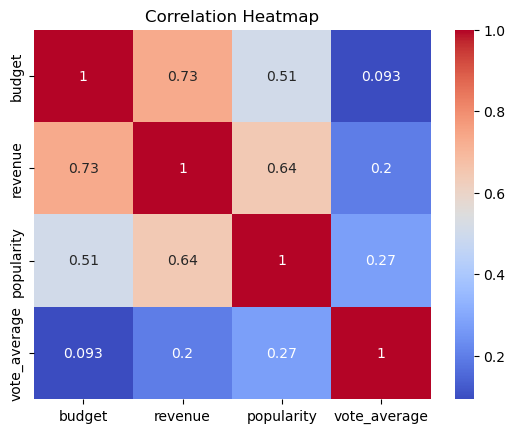

In [51]:
# Select only numeric columns for correlation
numeric_columns = movies.select_dtypes(include=['float64', 'int64']).columns
corr = movies[numeric_columns].corr()

# Plot the correlation heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


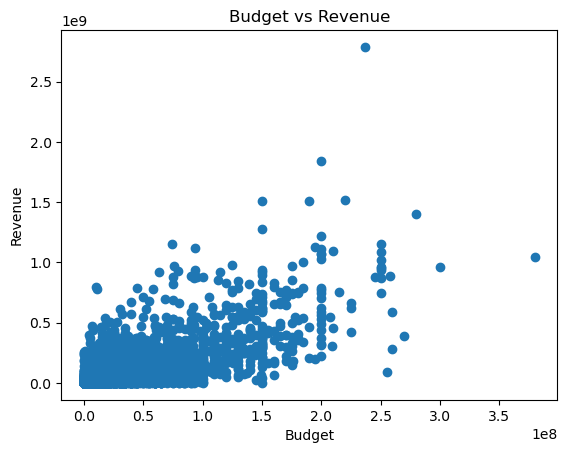

In [53]:
# Scatter plot: Budget vs Revenue
plt.scatter(movies['budget'], movies['revenue'])
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


# Step 8: Model Building
We build a Linear Regression model to predict movie revenue based on budget, popularity, and vote_average.


In [55]:
# Features and Target
X = movies[['budget', 'popularity', 'vote_average']]
y = movies['revenue']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)


# Step 9: Model Evaluation
We evaluate the model performance using Mean Absolute Error and R2 Score.


In [57]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Absolute Error: 52123865.64
R2 Score: 0.68
